In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [20]:
def load_data():
    data = pd.read_csv('Analisis.csv')
    return data

tweet_df = load_data()
tweet_df.head()

,waktu,tweets,Sentiment
0,2022-04-01 07:36:43,karanganyar jumat april serda eko santoso angg...,0
1,2022-04-01 07:36:32,ppkm level kota pekanbaru zona kuning tular covid,0
2,2022-04-01 07:24:13,ppkm longgar,1
3,2022-04-01 07:21:48,ppkm aspirasi,1
4,2022-04-01 07:19:50,karanganyar jumat april serda didik anggota ko...,0


In [21]:
df = pd.DataFrame(tweet_df[['waktu', 'tweets', 'Sentiment']])

In [22]:
tweet_df.head()
waktu = df['waktu']
result = []

# pengurangan tahun dan jam pada data waktu #
if len(df['waktu'][0]) != 5:
    for tgl in range(len(waktu)):
        waktu[tgl] = waktu[tgl][5:10]

# waktu
df.head()
tanggal_fix = []


for i in waktu:
    if i not in tanggal_fix:
        tanggal_fix.append(i)

jumlah_polarity = []
count = []
mines = []
plus = []

for i in range(len(tanggal_fix)):
    jumlah_polarity.append(0)
    count.append(0)
    mines.append(0)
    plus.append(0)

print(tanggal_fix)
for i in range(len(waktu)):
    for j in range(len(tanggal_fix)):
        if df['waktu'][i] == tanggal_fix[j]:
            jumlah_polarity[j] += df["Sentiment"][i]
            count[j] += 1
            if df['Sentiment'][i] == 1:
                plus[j] += 1
            else:
                mines[j] += 1
            continue


print(plus, mines)
avg = []

for i in range(len(tanggal_fix)):
    avg.append(round((plus[i]-mines[i])/count[i], 2))


# print(tot)


<ipython-input-22-6a163c6222ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waktu[tgl] = waktu[tgl][5:10]


['04-01', '04-11', '04-10', '06-03', '06-02', '06-01', '05-31', '04-09', '04-08', '04-07', '04-06', '04-05', '04-04', '04-03', '12-22', '12-21']
[36, 69, 64, 63, 88, 88, 5, 2, 3, 2, 4, 4, 2, 0, 79, 177] [42, 88, 68, 79, 91, 70, 19, 10, 4, 2, 20, 17, 5, 2, 133, 258]


In [23]:
import csv
from itertools import zip_longest
d = [tanggal_fix, jumlah_polarity, plus, mines, count, avg]
export_data = zip_longest(*d, fillvalue='')
with open('dataperhari1.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(("tanggal", "jumlah polarity", "positif", "negatif", "jumlah data", "rata_rata"))
    wr.writerows(export_data)
myfile.close()

In [24]:
# mengurutkan data
def load_data(datas):
    data = pd.read_csv(datas)
    return data

df2 = load_data('dataperhari1.csv')
df2sorted = df2.sort_values(by=["tanggal"], ascending=True)
df2sorted

,tanggal,jumlah polarity,positif,negatif,jumlah data,rata_rata
0,04-01,36,36,42,78,-0.08
13,04-03,0,0,2,2,-1.00
12,04-04,2,2,5,7,-0.43
11,04-05,4,4,17,21,-0.62
10,04-06,4,4,20,24,-0.67
9,04-07,2,2,2,4,0.00
8,04-08,3,3,4,7,-0.14
7,04-09,2,2,10,12,-0.67
2,04-10,64,64,68,132,-0.03
1,04-11,69,69,88,157,-0.12


In [25]:
print(df2['negatif'].tolist())

[42, 88, 68, 79, 91, 70, 19, 10, 4, 2, 20, 17, 5, 2, 133, 258]


<Figure size 3600x2400 with 0 Axes>

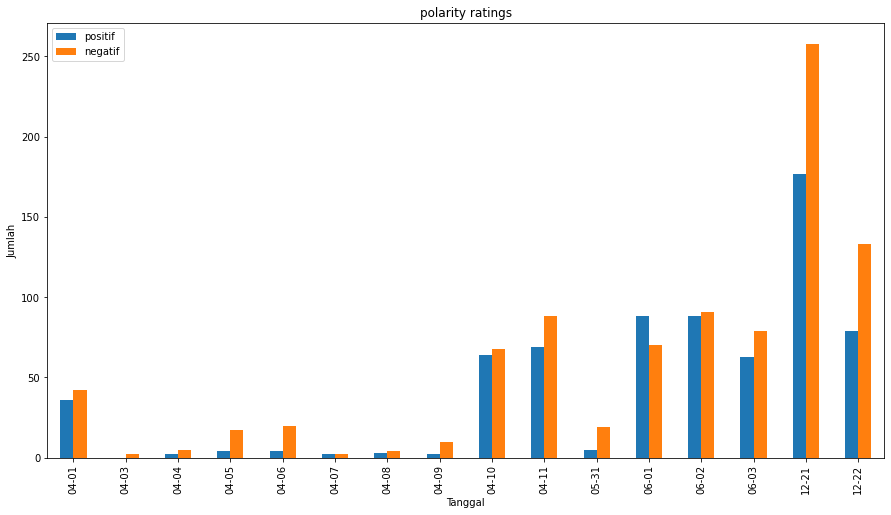

In [26]:
plt.figure(dpi=600)
plotdata = pd.DataFrame({
    "positif": df2sorted['positif'].tolist(),
    "negatif": df2sorted['negatif'].tolist()},
    index=df2sorted['tanggal']
)
plotdata.plot(kind="bar", figsize=(15, 8))

plt.title("polarity ratings")

plt.xlabel("Tanggal")

plt.ylabel("Jumlah")
plt.savefig("gambar/diagram sentimen.png")
# plt.bar(bar_coords, date)
# plt.xticks(bar_coords, fix)
plt.show()